In [4]:
include("../415notebooksMOD/motorprop.jl");

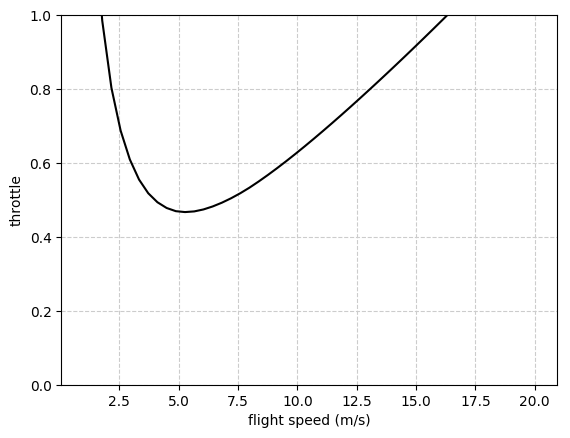

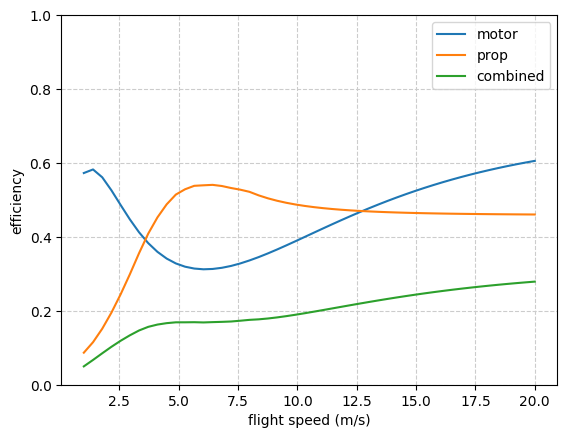

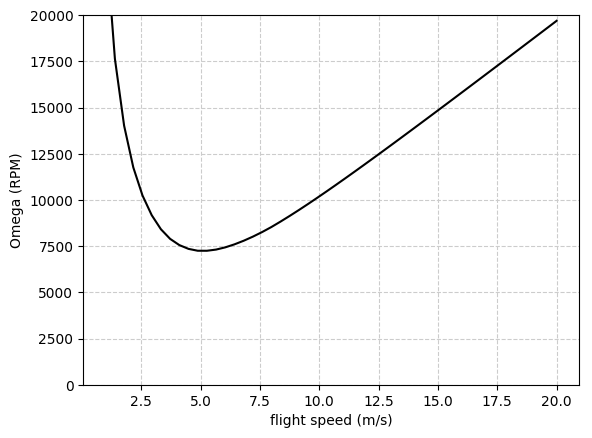

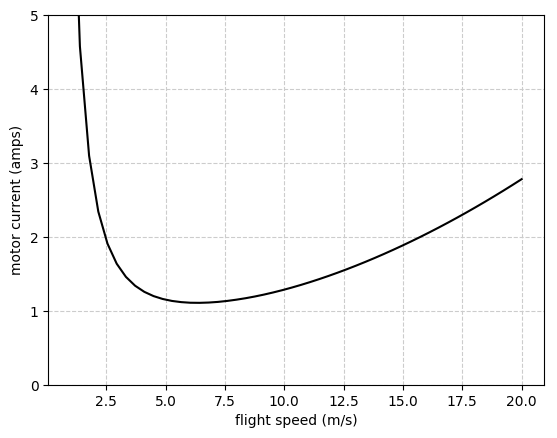

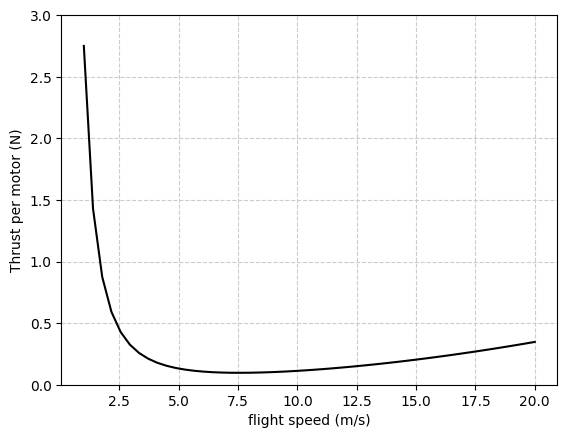

In [5]:
# ---- motor, battery, and prop inputs -----

# --- motor ---
Kv = 2760  # (RPM/Volt)
i0 = 0.67  # no load current (Amps)
R = 0.65  # resistance (Ohms)
vbatt = 7.2  # battery voltage (Volts)

# --- prop ----
# propeller data with columns J, CT, CP, eta (same format and normalization as from the UIUC site)
pdata = [
0.191482  0.086401  0.052685  0.314019
0.240662  0.080442  0.050881  0.380485
0.283730  0.074008  0.048687  0.431285
0.331900  0.066418  0.046009  0.479131
0.380651  0.058242  0.042948  0.516207
0.428387  0.049274  0.039252  0.537762
0.483105  0.038575  0.034435  0.541189
0.523810  0.030842  0.030775  0.524940
0.572153  0.020118  0.025059  0.459336
0.619438  0.009292  0.018984  0.303199
0.673904 -0.002999  0.011728 -0.172340
]

D = 4.2 * 0.0254  # prop diamter (m)
rho = 1.225  # atmospheric density (kg/m^3)

# --- operating parameters (one voltage, one flight speed) ---
throttle = 1.0  # number between 0 and 1 - not exactly throttle depending on esc
                # more precisely it is applied voltage relative to battery capacity: v/vbatt

V = 9.8  # flight speed (m/s)
# ------------------------------------------

# ----------- other aircraft inputs ------------
CDp = 0.00975  # parasitic drag coefficient
einv = 0.98  # inviscid span efficiency (NOT Oswald efficiency factor, that is computed internally)
Sref = 0.285  # reference area for CDp (m^2)
b = 1.2  # wing span (m)
nmotors = 2  # number of motors
mass = 383  # mass of airplane (grams)

# plotting parameters
Vmin = 1.0  # m/s
Vmax = 20.0  # m/s
Omegamax = 20000 # RPM (only used to cut off y-scale on last plot.  doesn't affect calculations at all.)
imax = 5.0  # Amp, just for ploting
Tmax = 3.0 # N, just for plotting 
# -----------------------

# run sweep
m = motordef(Kv, i0, R, vbatt)
p = propdef(pdata, D, rho)

ac = acdef(CDp, einv, Sref, b, nmotors, mass)
# steadylevelsweep(m, p, ac, Vmin, Vmax, Omegamax, imax, Tmax; save_path="./");
steadylevelsweep(m, p, ac, Vmin, Vmax, Omegamax, imax, Tmax; save_path=nothing);